## Classification

Classification is a supervised learning task where the goal is to predict a category (label) for a given input. Unlike regression, where the output is continuous, classification models predict a discrete label (category).

### Common Types of Classification Algorithms:
1. **Logistic Regression**: Used for binary classification tasks, like predicting whether a student passes or fails based on study hours.
2. **k-Nearest Neighbors (k-NN)**: A non-parametric method used for classification based on proximity to the nearest neighbors.
3. **Decision Trees**: A tree-based model where decisions are made at each node based on feature values.
4. **Random Forests**: An ensemble method combining multiple decision trees to improve classification accuracy.

We will start with Logistic Regression and k-NN examples.
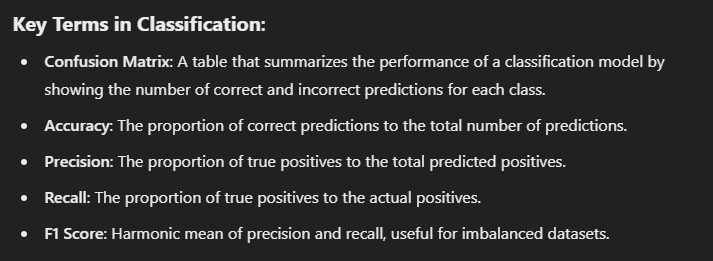

## Classification

Classification is the task of predicting a label or class for a given input. It is a core task in supervised learning, where the goal is to learn from labeled data to classify unseen data into the correct category.

### Popular Algorithms:
- Logistic Regression
- k-Nearest Neighbors (k-NN)
- Decision Trees
- Random Forests

We'll explore logistic regression and k-NN in the following code examples.


Logistic Regression for Binary Classification

Logistic Regression Accuracy: 1.0
Confusion Matrix:
 [[11  0]
 [ 0  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



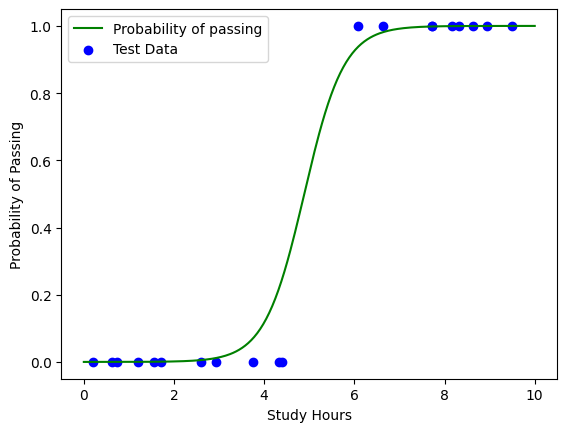

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generating synthetic data for logistic regression
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Study hours between 0 and 10
y = (X > 5).astype(int).ravel()  # Label 1 if study hours > 5, else 0 (pass/fail)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Making predictions
y_pred = log_reg.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Logistic Regression Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualizing the decision boundary
X_new = np.linspace(0, 10, 300).reshape(-1, 1)
y_prob = log_reg.predict_proba(X_new)[:, 1]

plt.plot(X_new, y_prob, "g-", label="Probability of passing")
plt.scatter(X_test, y_test, c="blue", label="Test Data")
plt.xlabel("Study Hours")
plt.ylabel("Probability of Passing")
plt.legend()
plt.show()


### Logistic Regression Results:

- **Accuracy**: The proportion of correct predictions over the total predictions.
- **Confusion Matrix**: This shows the number of true positives, true negatives, false positives, and false negatives.
- **Classification Report**: Provides metrics like precision, recall, and F1 score, which are important for understanding model performance, especially on imbalanced datasets.

In this example, logistic regression is used to classify whether a student will pass based on their study hours. The decision boundary visualizes how the probability of passing changes with study hours.


k-Nearest Neighbors (k-NN) Classification

k-NN Accuracy: 0.85
Confusion Matrix:
 [[16  3]
 [ 3 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        19
           1       0.86      0.86      0.86        21

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40



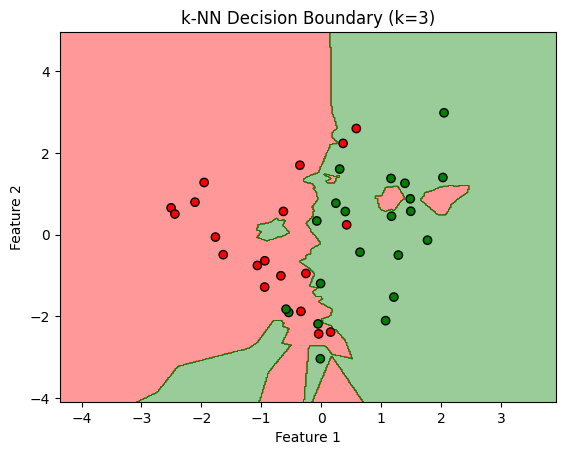

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

# Generating synthetic 2D data for visualization
X_knn, y_knn = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Splitting the data into training and testing sets
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

# Creating the k-NN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_knn, y_train_knn)

# Making predictions
y_pred_knn = knn.predict(X_test_knn)

# Evaluating the model
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test_knn, y_pred_knn)

print("k-NN Accuracy:", accuracy_knn)
print("Confusion Matrix:\n", conf_matrix_knn)
print("Classification Report:\n", classification_report(y_test_knn, y_pred_knn))

# Visualizing the decision boundary
x_min, x_max = X_knn[:, 0].min() - 1, X_knn[:, 0].max() + 1
y_min, y_max = X_knn[:, 1].min() - 1, X_knn[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'green')))
plt.scatter(X_test_knn[:, 0], X_test_knn[:, 1], c=y_test_knn, edgecolors='k', marker='o', cmap=ListedColormap(('red', 'green')))
plt.title('k-NN Decision Boundary (k=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### k-Nearest Neighbors (k-NN) Results:

- **Accuracy**: The percentage of correct predictions made by the k-NN classifier.
- **Confusion Matrix**: A summary of the correct and incorrect predictions by the model.

The k-NN classifier uses the 3 nearest neighbors to classify whether a student will pass or fail based on study hours. The decision boundary is less smooth than logistic regression, which shows the non-parametric nature of k-NN.


## Random Forest

Random Forest is an ensemble learning method that combines multiple decision trees to improve classification or regression accuracy. Each tree in the forest is trained on a random subset of the data, and the final output is the majority vote (for classification) or average prediction (for regression) from all trees.

### Key Features:
- **Reduces Overfitting**: By averaging multiple trees, Random Forest reduces the risk of overfitting compared to individual decision trees.
- **Handles Missing Data**: It can handle missing data by making splits based on the available information.
- **Feature Importance**: Random Forest can rank the importance of each feature in predicting the target variable.

We'll use Random Forest to classify a binary dataset and evaluate its performance.


Random Forest Accuracy: 0.85
Confusion Matrix:
 [[15  4]
 [ 2 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.83      0.90      0.86        21

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40



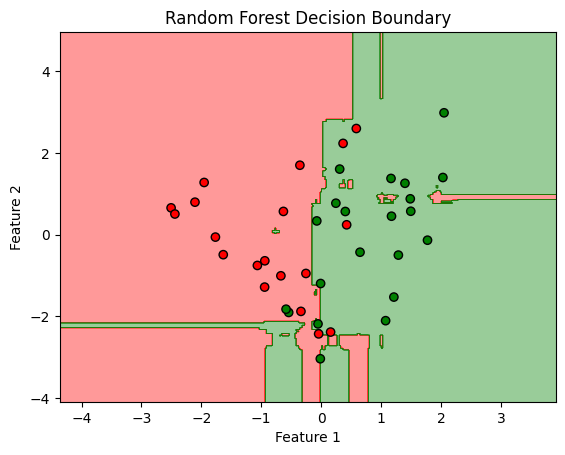

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

# Generating synthetic 2D data for visualization
X_rf, y_rf = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Splitting the data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Creating the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_rf, y_train_rf)

# Making predictions
y_pred_rf = rf_clf.predict(X_test_rf)

# Evaluating the model
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", classification_report(y_test_rf, y_pred_rf))

# Visualizing the decision boundary
x_min, x_max = X_rf[:, 0].min() - 1, X_rf[:, 0].max() + 1
y_min, y_max = X_rf[:, 1].min() - 1, X_rf[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = rf_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'green')))
plt.scatter(X_test_rf[:, 0], X_test_rf[:, 1], c=y_test_rf, edgecolors='k', marker='o', cmap=ListedColormap(('red', 'green')))
plt.title('Random Forest Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### Random Forest Results:

- **Accuracy**: Random Forest generally achieves higher accuracy than individual decision trees by averaging predictions across multiple trees.
- **Confusion Matrix**: Shows the number of correct and incorrect predictions for each class.
- **Classification Report**: Provides key metrics like precision, recall, F1-score, and support for each class.

In this example, Random Forest is used to predict whether a student will pass or fail based on their study hours. The decision boundary visualizes how the model classifies study hours.


### Advantages of Random Forest:

1. **Reduces Overfitting**: By combining the results of multiple trees, Random Forest tends to be more generalizable and less prone to overfitting.
2. **Handles Large Datasets**: Works efficiently on large datasets with higher dimensions (many features).
3. **Feature Importance**: Provides insight into which features are most important for prediction.
4. **Works with Missing Data**: Random Forest can handle missing data by constructing multiple trees that rely on different features.

### Key Hyperparameters:
- **n_estimators**: The number of trees in the forest.
- **max_depth**: Maximum depth of each tree. Limiting the depth can reduce overfitting.
- **min_samples_split**: Minimum number of samples required to split a node.


Explanation of the Visualizations:


k-NN Visualization:


-The decision boundary created by k-NN will be jagged or irregular because it relies on the local neighborhoods of each point to make predictions.
In this plot, you'll see two distinct regions for the two classes, colored red and green, showing how k-NN classifies based on the majority of neighbors.
Random Forest Visualization:


-The decision boundary for Random Forest will generally be smoother but more complex than a single decision tree. This is because Random Forest averages multiple decision trees, making the decision boundaries more stable.
As with k-NN, you will see two regions corresponding to the two classes, but the boundary might look smoother and more generalized.


Key Differences in Visualization:

-k-NN: The decision boundary is more localized and influenced by individual points in the dataset, which can make it irregular.

-Random Forest: The decision boundary is an aggregation of multiple decision trees, leading to a smoother, more generalized boundary, which reduces the risk of overfitting compared to a single decision tree.